In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.transform as skt
import skimage
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

Accessing images from different subfolders and storing them

In [ ]:
main_dir = "/content/drive/MyDrive/Colab Notebooks/brain_tumor/kaggle_brain_tumor"
sub_dirs = os.listdir(main_dir)
No_path = main_dir +"/"+sub_dirs[0]
Yes_path = main_dir +"/"+sub_dirs[2]

No_Tumors = []
Yes_Tumors = []

##No Brain Tumor 
for p in os.listdir(No_path):
  img_path = os.path.join(No_path, p)
  No_Tumors.append(cv2.imread(img_path))

##Yes Brain Tumor
for p in os.listdir(Yes_path):
  img_path = os.path.join(Yes_path, p)
  Yes_Tumors.append(cv2.imread(img_path))


In [ ]:
Yes_Tumors[0].shape

(512, 512, 3)

In [ ]:
No_Tumors = np.array(No_Tumors, dtype='object')
Yes_Tumors = np.array(Yes_Tumors, dtype='object')

Visualizing few tumor and no tumor brain MRI samples

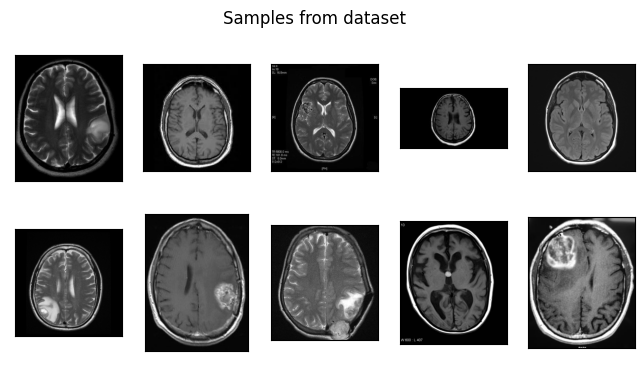

In [ ]:
n=10
plt.figure(figsize=(8,4), dpi=100)
plt.suptitle("Samples from dataset")

for j in range(1,n+1):
  if j<=n/2:
    plt.subplot(2,n/2,j, label='No')
    plt.imshow(No_Tumors[j-1])
    plt.xticks([])
    plt.yticks([])

  else:
    i=j-(n//2)
    plt.subplot(2,n/2,j)
    plt.imshow(Yes_Tumors[i-1])
    plt.xticks([])
    plt.yticks([])

Resizing the images to same dimesions

In [ ]:
# No_Tumors[3].shape
dims = (150, 200)
resized_No_Tumors = []
resized_Yes_Tumors = []
for img in No_Tumors:
  resized_img = cv2.resize(img, dsize=dims)
  resized_No_Tumors.append(resized_img)

for img in Yes_Tumors:
  resized_img = cv2.resize(img, dsize=dims, interpolation = cv2.INTER_AREA)
  resized_Yes_Tumors.append(resized_img)

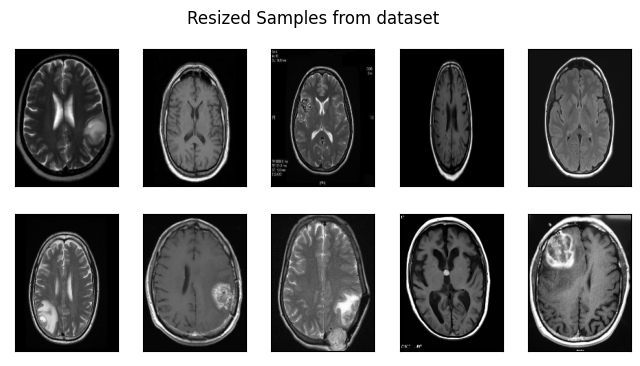

In [ ]:
n=10
plt.figure(figsize=(8,4), dpi=100)
plt.suptitle("Resized Samples from dataset")

for j in range(1,n+1):
  if j<=n/2:
    plt.subplot(2,n/2,j, label='No')
    plt.imshow(resized_No_Tumors[j-1])
    plt.xticks([])
    plt.yticks([])

  else:
    i=j-(n//2)
    plt.subplot(2,n/2,j)
    plt.imshow(resized_Yes_Tumors[i-1])
    plt.xticks([])
    plt.yticks([])

Checking the count of number of samples in each class

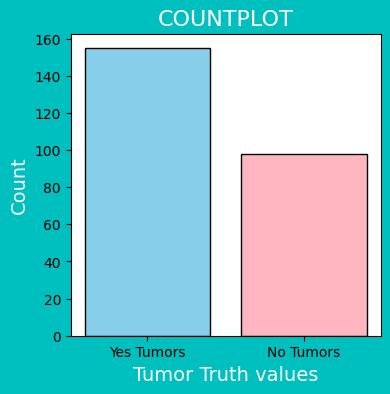

In [ ]:
fig = plt.figure(facecolor='c', figsize=(4,4), dpi=100, edgecolor='c') #dpi for resolution in dots per inch
X_values = ['Yes Tumors', 'No Tumors']
Y_values = [len(Yes_Tumors), len(No_Tumors)]

plt.bar(X_values, Y_values, edgecolor='k', color=['skyblue','lightpink']) ## Bar plot
plt.title("COUNTPLOT", fontsize=16, color='white')
plt.xlabel("Tumor Truth values", size=14, color='w')
plt.ylabel("Count", size=14, color='w');


In [ ]:
print(Y_values)

[155, 98]


Balancing the number of samples of each class


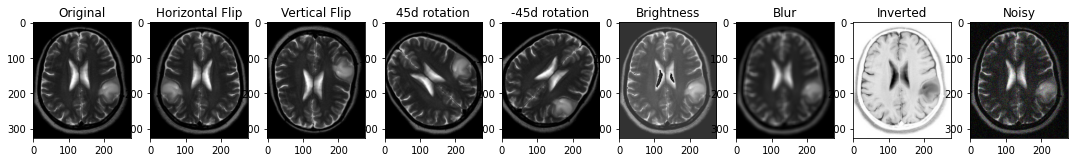

In [ ]:
#Data Augmentation in No Tumors class

img = No_Tumors[0] 

fig = plt.figure(figsize=(20,40))
plt.subplot(1,10,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,10,2)
plt.title("Horizontal Flip")
hflip = np.fliplr(img)
plt.imshow(hflip)

plt.subplot(1,10,3)
plt.title("Vertical Flip")
vflip = np.flipud(img)
plt.imshow(vflip)

plt.subplot(1,10,4)
plt.title("45d rotation")
r45 = skt.rotate(img, angle=45)
plt.imshow(r45)

plt.subplot(1,10,5)
plt.title("-45d rotation")
r_45 = skt.rotate(img, angle = -45)
plt.imshow(r_45)

plt.subplot(1,10,6)
plt.title("Brightness")
br = np.clip(img+50, 0, 255)
plt.imshow(br)

plt.subplot(1,10,7)
plt.title("Blur")
blur = cv2.blur(img,(10,10))
plt.imshow(blur)

plt.subplot(1,10,8)
plt.title("Inverted")
plt.imshow(np.invert(img))

plt.subplot(1,10,9)
plt.title("Noisy")
plt.imshow(skimage.util.random_noise(img))

plt.subplots_adjust(wspace = 0.2, left = 0.1)

In [ ]:
train_yes, test_yes = train_test_split(resized_Yes_Tumors, test_size = 0.2, random_state = 0)
train_no, test_no = train_test_split(resized_No_Tumors, test_size = 0.2, random_state = 0)

In [ ]:
# train_no

In [ ]:
def rotation(img):
  d = np.random.choice(np.arange(10, 170, 15))
  # print(d)
  return skt.rotate(img, angle=d)

def blur(img): 
  return cv2.blur(img,(4,4))

def noise(img):
  return skimage.util.random_noise(img)

In [ ]:
nsamples2replicate = len(train_yes) - len(train_no)
print("No. of samples to be replicated in No Tumor is ", nsamples2replicate)

No. of samples to be replicated in No Tumor is  46


In [ ]:
augmented_list =[]
for i in range(nsamples2replicate):
  random_sample = train_no[np.random.choice(range(len(train_no)))]
  no_of_transformations = np.random.choice(range(3))
  transformations = random.sample(range(3), no_of_transformations)
  img = random_sample
  for t in transformations:
    img = data_augmentation_fn_dict[t](img)
    # data_augmentation_dict[t]
  augmented_list.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


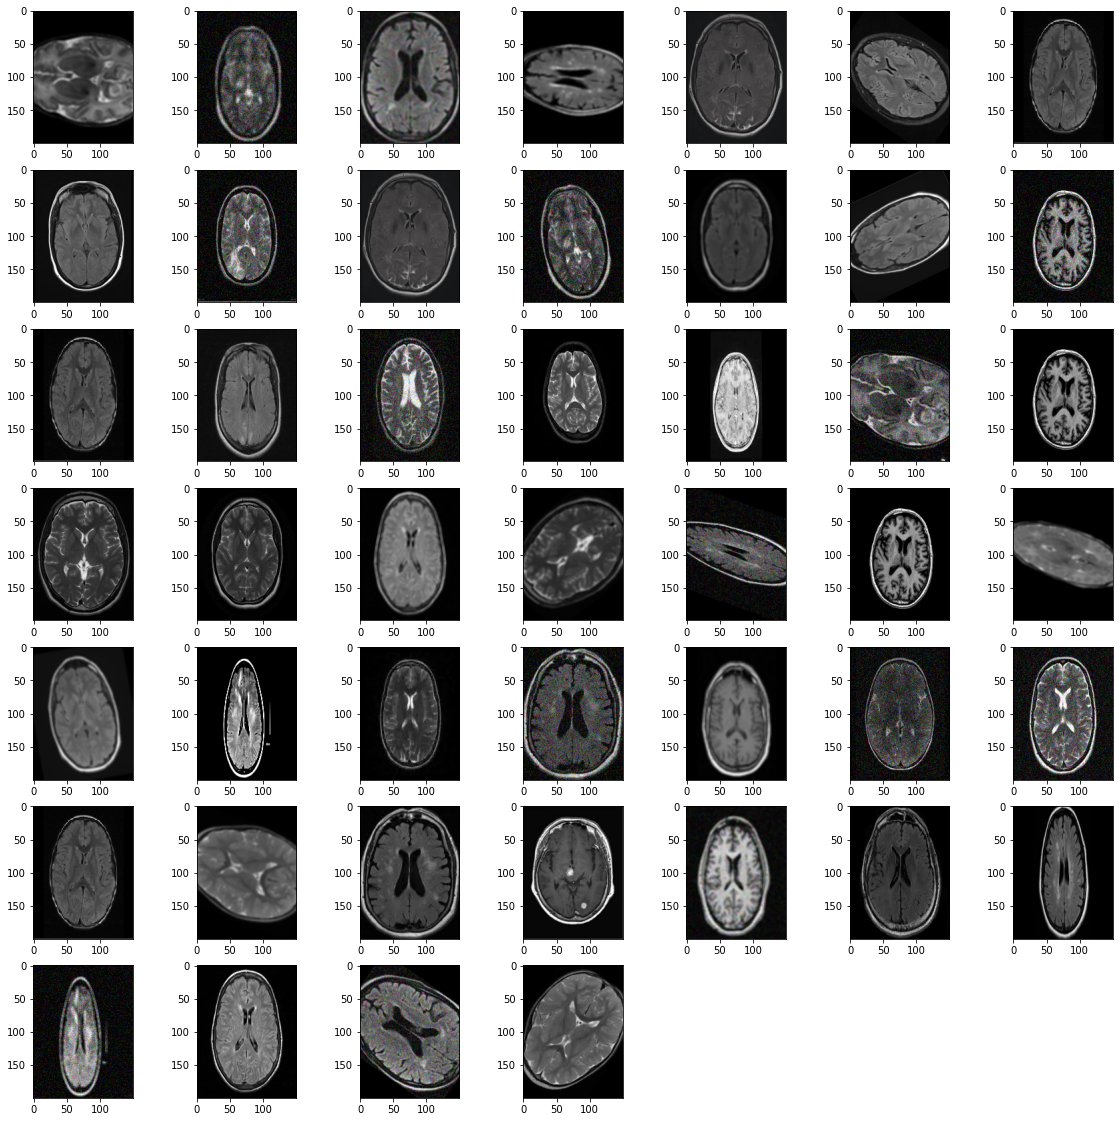

In [ ]:
plt.figure(figsize=(20,20))
# plt.suptitle("Augmented Samples", size=20)
for i in range(len(augmented_list)):
  plt.subplot(7, len(augmented_list)//6, i+1)
  plt.imshow(augmented_list[i])


In [ ]:
for each in augmented_list:
  train_no.append(each)

In [ ]:
y =[]
for i in range(len(train_no)):
  y.append(0)
for i in range(len(train_yes)):
  y.append(1)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
train_data =[]
for each in train_no:
  train_yes.append(each)
  

In [ ]:
train_data, val_data, y_train, y_val = train_test_split(train_yes, y, test_size=0.2)

In [ ]:
# train_data = np.expand_dims(np.array(train_data), axis=1)
# val_data = np.expand_dims(np.array(val_data), axis=1)

In [ ]:
train_data = np.asarray(train_data)/255.0
val_data = np.asarray(val_data)/255.0
y_val = np.asarray(y_val)
y_train = np.asarray(y_train).T
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

In [ ]:
print(train_data.shape)
print(y_train.shape)

(198, 200, 150, 3)
(198, 2)


# With only dense layer

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [ ]:
from tensorflow.keras.layers import Dense 

In [ ]:
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)

In [ ]:
import random
random.seed(0)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(train_data, y_train, epochs=30, verbose=1, batch_size=50, validation_data=(val_data, y_val), callbacks=[es])

Epoch 1/30
4/4 [==============================] - 3s 520ms/step - loss: 5.9116 - accuracy: 0.5367 - val_loss: 7.7485 - val_accuracy: 0.5600
Epoch 2/30
4/4 [==============================] - 2s 388ms/step - loss: 7.0255 - accuracy: 0.4921 - val_loss: 8.5312 - val_accuracy: 0.4400
Epoch 3/30
4/4 [==============================] - 1s 372ms/step - loss: 6.8947 - accuracy: 0.4835 - val_loss: 2.9671 - val_accuracy: 0.5600
Epoch 4/30
4/4 [==============================] - 1s 366ms/step - loss: 3.3639 - accuracy: 0.4552 - val_loss: 2.8617 - val_accuracy: 0.4400
Epoch 5/30
4/4 [==============================] - 1s 368ms/step - loss: 1.9312 - accuracy: 0.5100 - val_loss: 1.0000 - val_accuracy: 0.5600
Epoch 6/30
4/4 [==============================] - 1s 366ms/step - loss: 1.2098 - accuracy: 0.5094 - val_loss: 1.1871 - val_accuracy: 0.5600
Epoch 7/30
4/4 [==============================] - 1s 382ms/step - loss: 1.3109 - accuracy: 0.5093 - val_loss: 2.3807 - val_accuracy: 0.4400
Epoch 8/30
4/4 [====

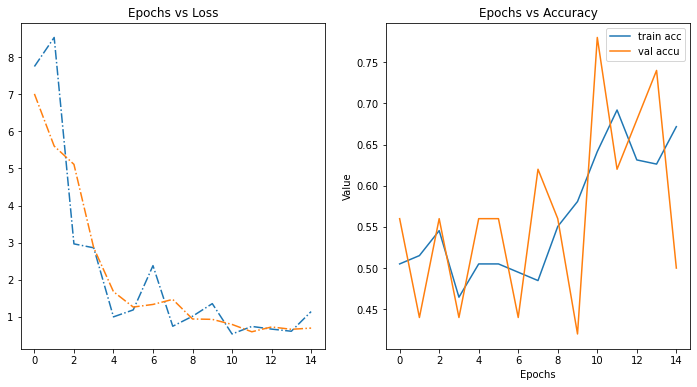

In [ ]:
fig = plt.figure(figsize=(12,6))
n = 15

plt.subplot(121)
plt.title("Epochs vs Loss")
plt.plot(range(n), history1.history['val_loss'], linestyle='dashdot', label='val_loss')
plt.plot(range(n), history1.history['loss'], linestyle='dashdot', label='train loss')
# plt.plot(range(n), history1.history['accuracy'], label="train acc")
# plt.plot(range(n), history1.history['val_accuracy'], label= 'val accu')

plt.subplot(122)
plt.title("Epochs vs Accuracy")
# plt.plot(range(n), history1.history['val_loss'], linestyle='dashdot', label='val_loss')
# plt.plot(range(n), history1.history['loss'], linestyle='dashdot', label='train loss')
plt.plot(range(n), history1.history['accuracy'], label="train acc")
plt.plot(range(n), history1.history['val_accuracy'], label= 'val accu')

plt.xlabel("Epochs")
plt.ylabel("Value")

plt.legend(loc='best');


#CNN

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu', input_shape=(200, 150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Activation('softmax'))

model.add(layers.Dense(32))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 72, 256)       73984     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 36, 256)       0         
_________________________________________________________________
activation (Activation)      (None, 48, 36, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 34, 32)       

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.predict(train_data).shape)

history = model.fit(train_data, y_train, epochs=25, verbose=1, batch_size=50, validation_data=(val_data, y_val), callbacks=[es])

(198, 2)
Epoch 1/25
4/4 [==============================] - 4s 822ms/step - loss: 0.6999 - accuracy: 0.4933 - val_loss: 0.6924 - val_accuracy: 0.5600
Epoch 2/25
4/4 [==============================] - 3s 780ms/step - loss: 0.6935 - accuracy: 0.4786 - val_loss: 0.6908 - val_accuracy: 0.5600
Epoch 3/25
4/4 [==============================] - 3s 795ms/step - loss: 0.6907 - accuracy: 0.5127 - val_loss: 0.7061 - val_accuracy: 0.4400
Epoch 4/25
4/4 [==============================] - 3s 789ms/step - loss: 0.6904 - accuracy: 0.5276 - val_loss: 0.6670 - val_accuracy: 0.7600
Epoch 5/25
4/4 [==============================] - 3s 780ms/step - loss: 0.6595 - accuracy: 0.7396 - val_loss: 0.6425 - val_accuracy: 0.5400
Epoch 6/25
4/4 [==============================] - 3s 781ms/step - loss: 0.6156 - accuracy: 0.6366 - val_loss: 0.5652 - val_accuracy: 0.7600
Epoch 7/25
4/4 [==============================] - 3s 773ms/step - loss: 0.5564 - accuracy: 0.7122 - val_loss: 0.5466 - val_accuracy: 0.7400
Epoch 8/25


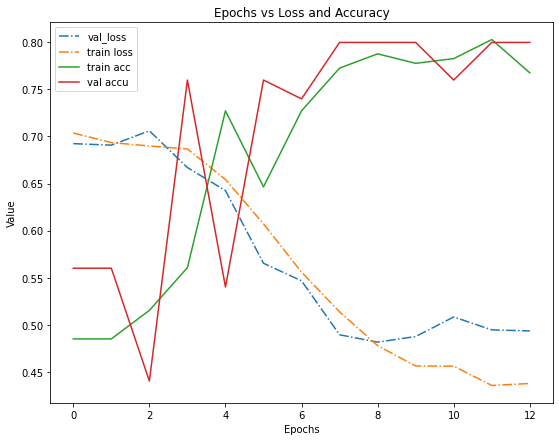

In [ ]:
fig = plt.figure(figsize=(9,7))
n = 13

plt.title("Epochs vs Loss and Accuracy")
plt.plot(range(n), history.history['val_loss'], linestyle='dashdot', label='val_loss')
plt.plot(range(n), history.history['loss'], linestyle='dashdot', label='train loss')
plt.plot(range(n), history.history['accuracy'], label="train acc")
plt.plot(range(n), history.history['val_accuracy'], label= 'val accu')

plt.xlabel("Epochs")
plt.ylabel("Value")

plt.legend(loc='best');


In [ ]:
pred = np.round(model.predict(val_data))
# np.argmax(a, axis=1)

In [ ]:
a = np.where(pred==1)[1]

In [ ]:
b = np.where(y_val==1)[1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[24  4]
 [ 6 16]]


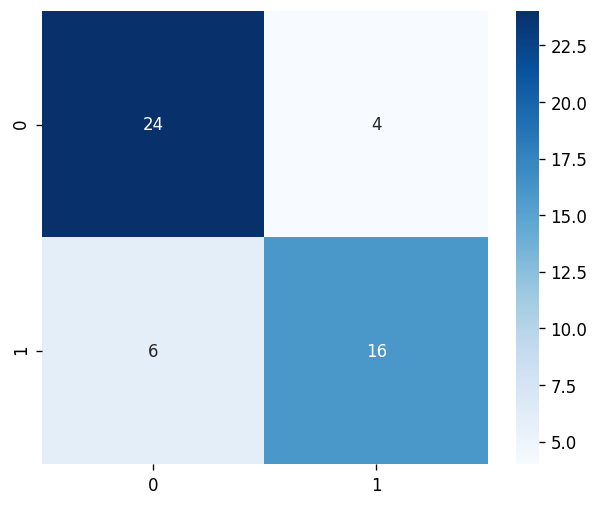

In [ ]:
cm = confusion_matrix(b, a)
print(cm)
plt.figure(figsize=(6,5), dpi=120)
sns.heatmap(cm, annot=True, cmap = plt.cm.Blues, fmt='g');#0 - no tumor

In [ ]:
print(classification_report(b, a)) 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.80      0.73      0.76        22

    accuracy                           0.80        50
   macro avg       0.80      0.79      0.79        50
weighted avg       0.80      0.80      0.80        50

